In [45]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Set dark theme
sns.set(style="darkgrid")
plt.style.use("dark_background")

In [53]:
# Load data (tailored file path from your screenshot)
df = pd.read_csv(r"C:\Users\X\Downloads\archive (7)\index.csv")

In [91]:
#  Data Preprocessing
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

start_date = pd.to_datetime("2024-03-01")
end_date = pd.to_datetime("2024-08-07")
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

print(f" **Total Transactions:** **{df.shape[0]}**")
print(" Data Columns:", list(df.columns))

 **Total Transactions:** **1200**
 Data Columns: ['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name', 'month', 'payment_method', 'hour']


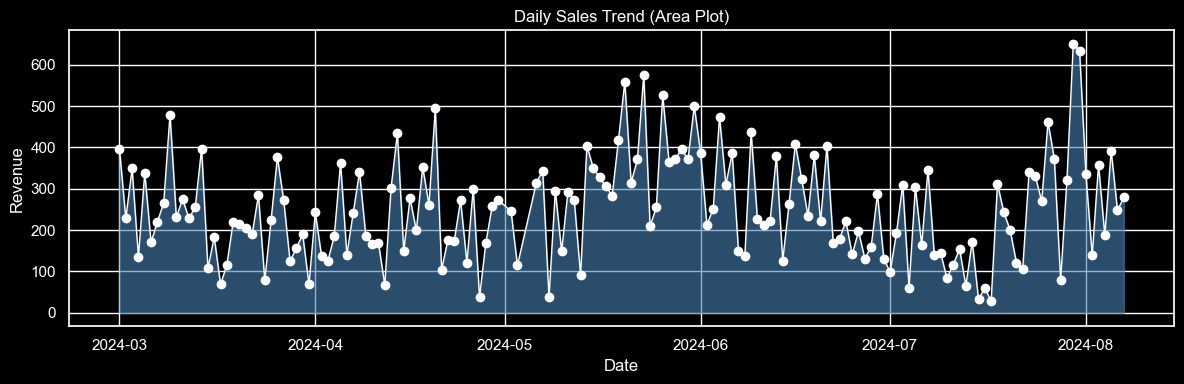

In [105]:
# 🚀 Area Chart for Daily Sales Trend
daily_sales = df.groupby('date')['money'].sum().reset_index()

plt.figure(figsize=(12,4))
plt.fill_between(daily_sales['date'], daily_sales['money'], color="steelblue", alpha=0.6)
plt.plot(daily_sales['date'], daily_sales['money'], marker="o", color="white", linewidth=1)
plt.title("Daily Sales Trend (Area Plot)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [93]:
#  Monthly Revenue
df['month'] = df['date'].dt.to_period('M')
monthly_revenue = df.groupby('month')['money'].sum().reset_index()
print(" **Monthly Revenue:**")
print(monthly_revenue)

 **Monthly Revenue:**
     month    money
0  2024-03  7050.20
1  2024-04  6720.56
2  2024-05  9063.42
3  2024-06  7758.76
4  2024-07  6915.94
5  2024-08  1939.24


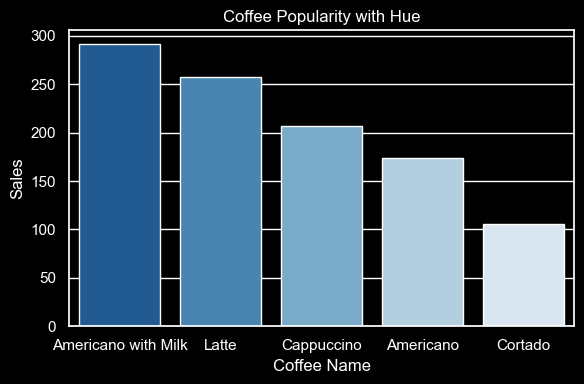

In [89]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=top_coffees,
    x='coffee_name',
    y='sales',
    hue='coffee_name',         # use the same column for hue
    dodge=False,               # prevent side-by-side bars
    palette="Blues_r",
    legend=False               # optional: hide legend
)
plt.xlabel("Coffee Name")
plt.ylabel("Sales")
plt.title("Coffee Popularity with Hue")
plt.tight_layout()
plt.show()


 **Payment Methods:**
  payment_method  count
0           Card   1111
1           Cash     89
 **Average Transaction Value:**
  payment_method      money
0           Card  32.639172
1           Cash  35.797753


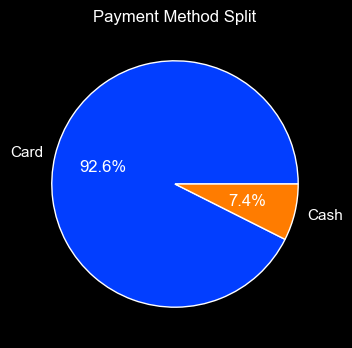

In [95]:
# Payment Methods Analysis
df['payment_method'] = df['card'].apply(lambda x: "Card" if pd.notnull(x) else "Cash")
payment_counts = df['payment_method'].value_counts().reset_index()
payment_counts.columns = ['payment_method', 'count']

print(" **Payment Methods:**")
print(payment_counts)

avg_transaction = df.groupby('payment_method')['money'].mean().reset_index()
print(" **Average Transaction Value:**")
print(avg_transaction)

plt.figure(figsize=(6,4))
colors = sns.color_palette("bright", n_colors=len(payment_counts))
plt.pie(
    payment_counts['count'],
    labels=payment_counts['payment_method'],
    autopct='%1.1f%%',
    colors=colors,
    textprops={'color':'white'}
)
plt.title("Payment Method Split")
plt.show()

In [97]:
#  Customer Loyalty Analysis
card_transactions = df[df['payment_method'] == "Card"]
repeat_customers = card_transactions['card'].value_counts().reset_index()
repeat_customers.columns = ['card', 'transactions']

print(" **Top Repeat Customers (Card):**")
print(repeat_customers.head(5))

top_spender = card_transactions.groupby('card')['money'].sum().reset_index().sort_values(by='money', ascending=False)
print(" **Top Spender (Card):**")
print(top_spender.head(1))

 **Top Repeat Customers (Card):**
                  card  transactions
0  ANON-0000-0000-0012            88
1  ANON-0000-0000-0009            66
2  ANON-0000-0000-0097            31
3  ANON-0000-0000-0040            26
4  ANON-0000-0000-0003            25
 **Top Spender (Card):**
                   card    money
11  ANON-0000-0000-0012  2593.18


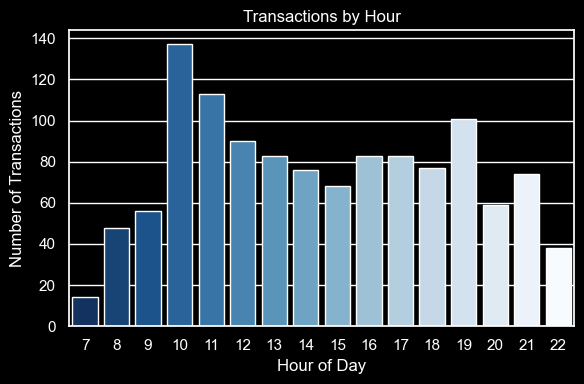

In [77]:

#  Time Analysis: Busiest Hours
plt.figure(figsize=(6,4))
sns.barplot(
    data=hourly_transactions,
    x='hour',
    y='transactions',
    hue='hour',             # specify the hue
    dodge=False,            # keep bars side by side
    palette="Blues_r",      # palette applied to each hour
    legend=False            # hide legend if desired
)
plt.title("Transactions by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()

